In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv("C:/Users/KIIT/Downloads/kidney_disease.csv")  #1. Data Collection

In [106]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [107]:
columns =  pd.read_csv("C:/Users/KIIT/Downloads/data_description.txt", sep='-')
columns = columns.reset_index()

In [108]:
columns.columns=['cols', 'col_names']

In [109]:
df.columns = columns['col_names'].values   #Converting to a user-friendly format

In [110]:
df

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7    pus cell                335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [112]:
def convert_dtype(df,feature):     #Converting data type from 'object' to 'float64'   #Data Cleaning
    df[feature] = pd.to_numeric(df[feature], errors = 'coerce')

In [113]:
features = ['packed cell volume', 'white blood cell count', 'red blood cell count']  #Features to convert object -> float64
for f in features:
    convert_dtype(df,f)        #convert_dtype function call

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7    pus cell                335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [115]:
df.drop('id', inplace = True, axis = 1)   #Removing index id

In [116]:
def extract(df):
    cat_col = [col for col in df.columns if df[col].dtype == 'object']
    num_col = [col for col in df.columns if df[col].dtype != 'object']
    return cat_col,num_col    

In [117]:
cat_col,num_col = extract(df)

In [118]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [119]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [120]:
for col in cat_col:           
    print("{} has {} values".format(col,df[col].unique()))
    print("\n")

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary artery disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




In [121]:
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'}, inplace=True)   #Data Cleaning
df['coronary artery disease'].replace(to_replace={'\tno':'no'}, inplace=True)
df['class'].replace(to_replace={'ckd\t':'ckd'}, inplace=True)

In [122]:
len(num_col)

14

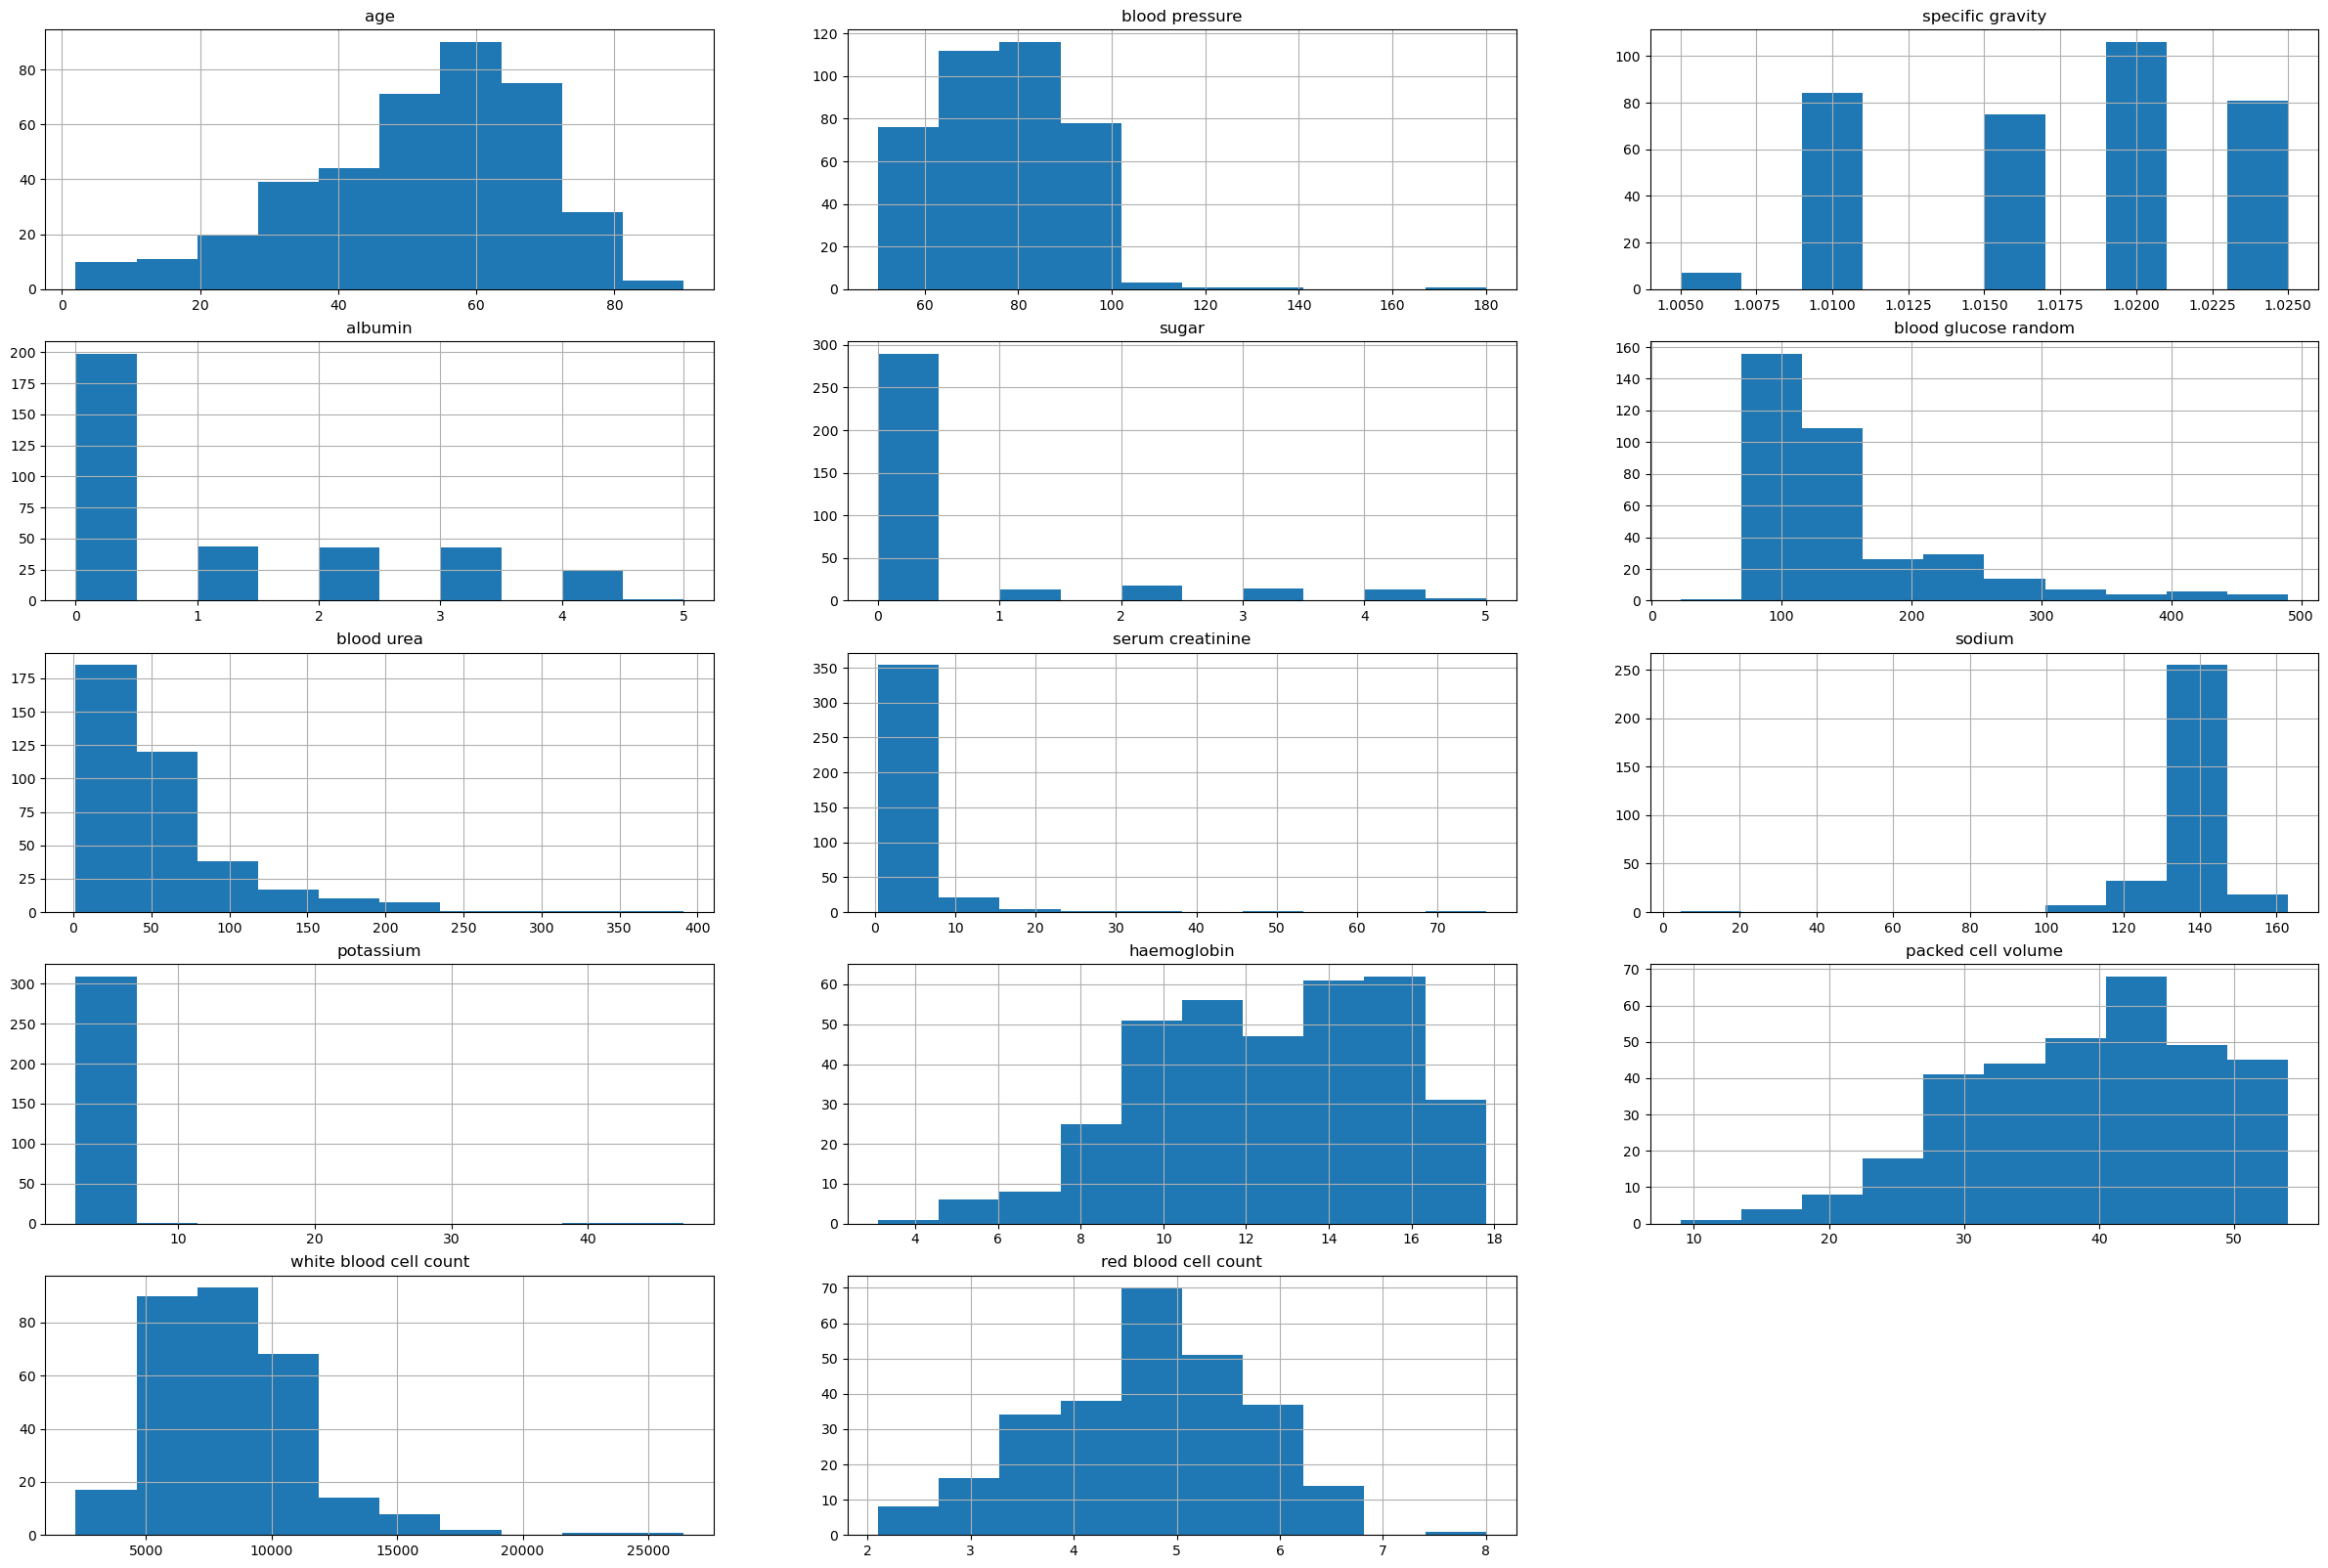

In [123]:
plt.figure(figsize=(30,20))     #Finding characteristics of each Individual features

for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)
    

In [128]:
len(cat_col)

11

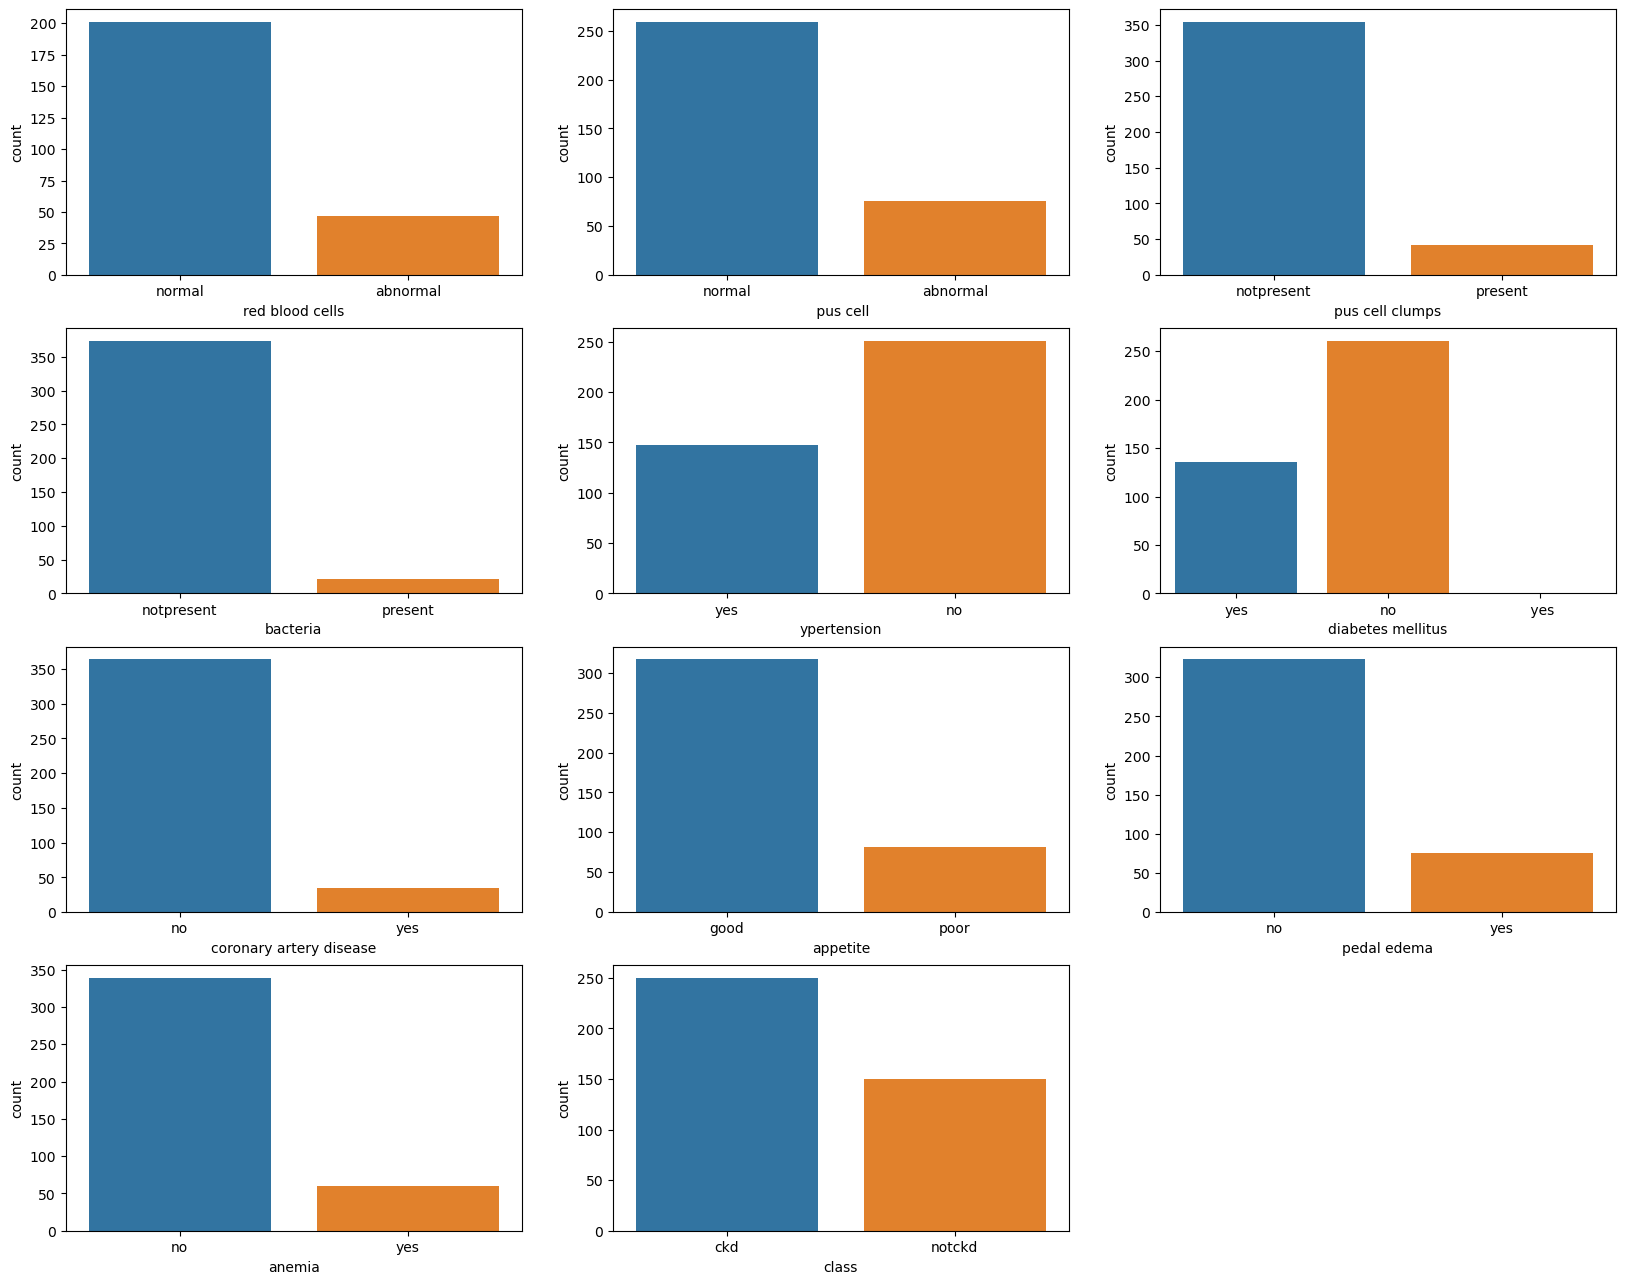

In [132]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(5,3,i+1)
    sns.countplot(x= df[feature])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_24880\920890659.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



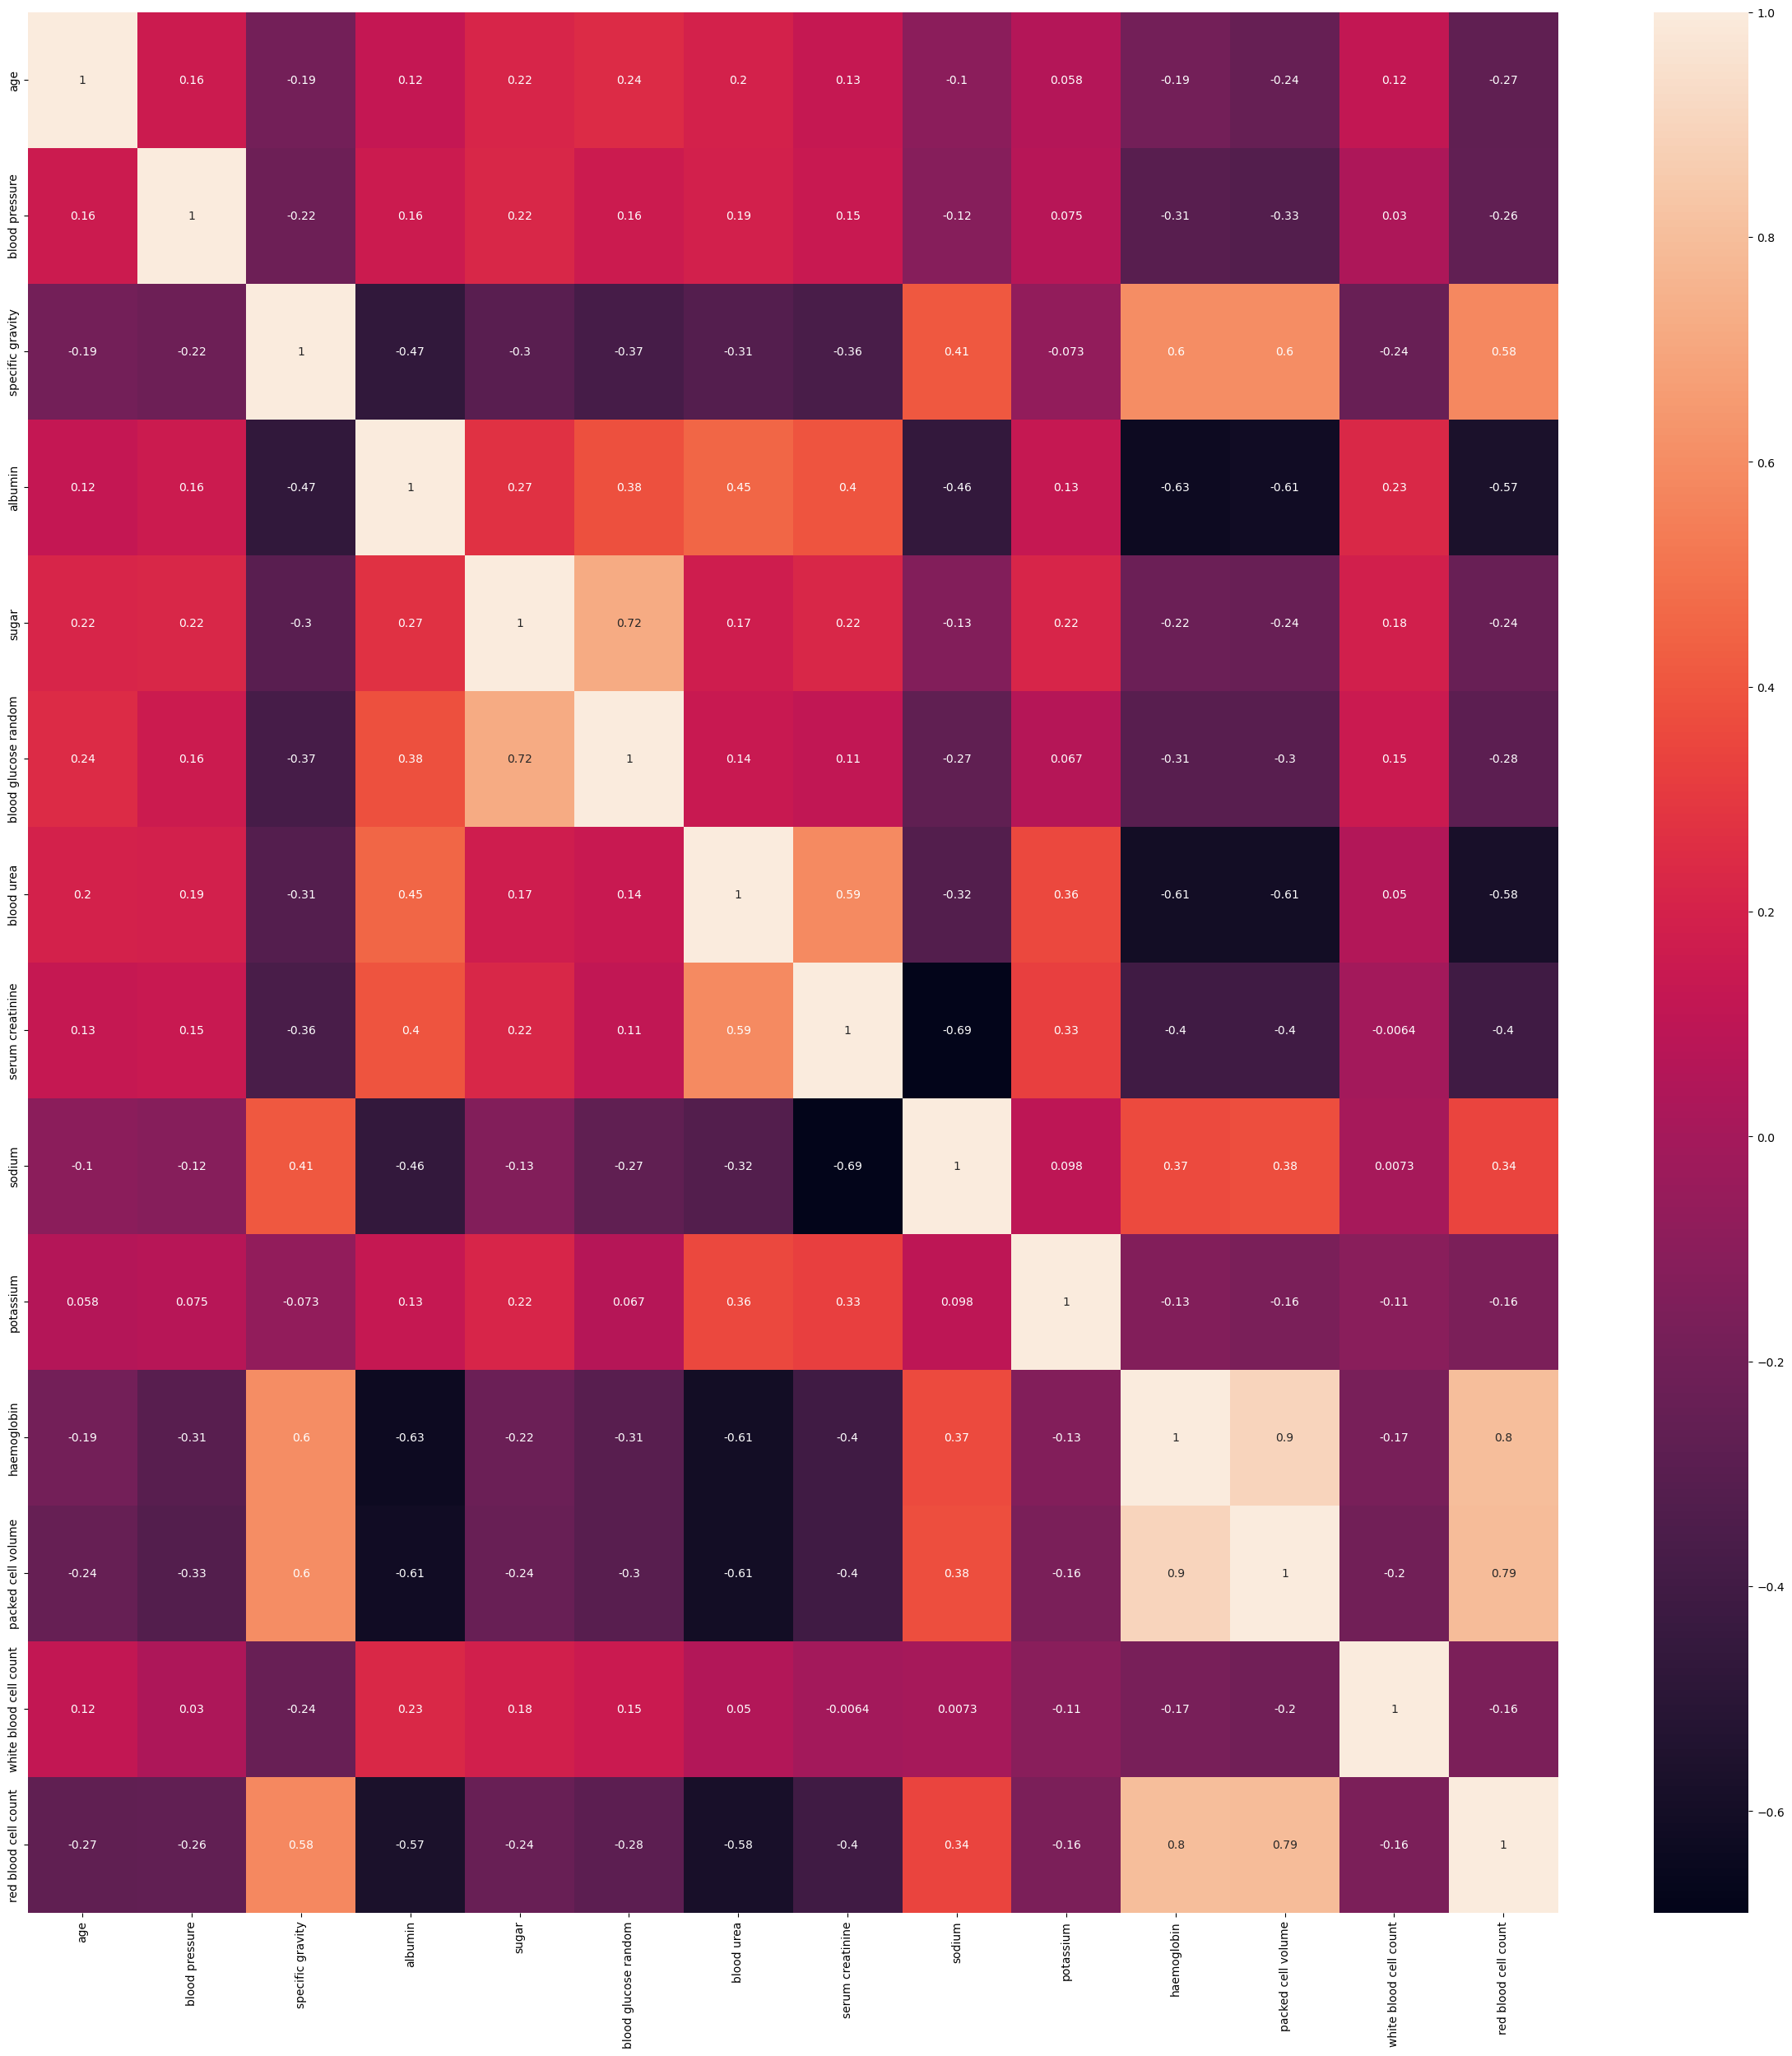

In [147]:
plt.figure(figsize=(30,30))        #Finding correlations between features (To find strenth and direction)
cor = df.corr()
sns.heatmap(data=cor, annot=True)
plt.savefig('heat.jpg')

In [150]:
import plotly.express as px

In [151]:
def violen(col):      #Violen plot
    fig = px.violin(df,x='class', y=col, color='class')
    return fig.show() 

In [152]:
def scatter(x_1,y_1):  #Scatter plot
    fig = px.scatter(df,x=x_1, y = y_1, color='class')
    return fig.show() 

In [153]:
def scatter_3d(x_1,y_1,z_1):  #Scatter 3D plot
    fig = px.scatter_3d(df, x=x_1, y =y_1, z = z_1, color='class')
    return fig.show()

In [154]:
def kde_plot(feature):       #Plot K-distribution
    grid = sns.FacetGrid(df, hue='class')
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

In [155]:
violen('sugar')

In [156]:
scatter('packed cell volume', 'red blood cell count')

In [157]:
scatter_3d('blood pressure','sugar','age')

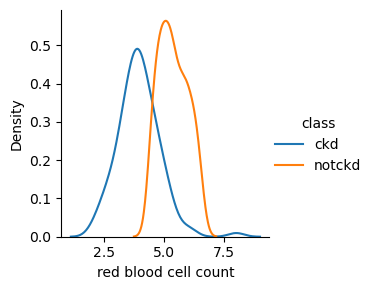

In [159]:
kde_plot('red blood cell count')

In [160]:
df.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

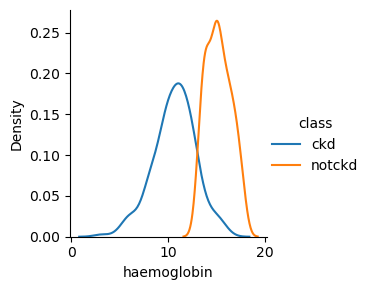

In [161]:
kde_plot('haemoglobin')

In [162]:
violen('packed cell volume')

In [163]:
df.isna().sum().sort_values(ascending=False)   # No. of missing values in each column


red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [164]:
def fillnull(feature):         #Random Sample Value filler function
    data = df.copy()
    random_sample = data[feature].dropna().sample(data[feature].isna().sum())
    random_sample.index = data[data[feature].isna()].index
    data.loc[data[feature].isnull(), feature] = random_sample
    
    return data

In [165]:
#random_sample = data['red blood cells'].dropna().sample(data['red blood cells'].isna().sum())
#rand_sample

In [166]:
#data[data['red blood cells'].isna()].index

In [167]:
#random_sample.index = data[data['red blood cells'].isna()].index
#random_sample.index

In [168]:
#data.loc[data['red blood cells'].isnull(), 'red blood cells'] = random_sample

In [169]:
#data['red blood cells'].isna().sum()

In [170]:
for i,feature in enumerate(df.columns):
    df = fillnull(feature)

In [171]:
df.isna().sum() 

age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed cell volume         0
white blood cell count     0
red blood cell count       0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [172]:
for col in cat_col:
    print("{} has {}".format(col,df[col].unique()) )
    print("\n")

red blood cells has ['normal' 'abnormal']


 pus cell has ['normal' 'abnormal']


pus cell clumps has ['notpresent' 'present']


bacteria has ['notpresent' 'present']


ypertension has ['yes' 'no']


diabetes mellitus has ['yes' 'no' ' yes']


coronary artery disease has ['no' 'yes']


appetite has ['good' 'poor']


pedal edema has ['no' 'yes']


anemia has ['no' 'yes']


class has ['ckd' 'notckd']




In [173]:
#Label encoding
#normal = 0
#abnormal = 1

In [174]:
from sklearn.preprocessing import LabelEncoder

In [175]:
for col in cat_col:
    df[col] = LabelEncoder().fit_transform(df[col])

In [176]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,81.0,...,38.0,6000.0,3.9,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.2,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


In [177]:
from sklearn.feature_selection import SelectKBest  #Selecting the best 'K' features out of 'N' features
from sklearn.feature_selection import chi2

In [178]:
#X = df.drop('class', axis = 1)       #Independent Features
#Y = df['class'] #Dependent Features
ind_col=[col for col in df.columns if col!='class']
dep_col='class'
X=df[ind_col]
Y=df[dep_col]

In [179]:
X

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,81.0,...,11.3,38.0,6000.0,3.9,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.2,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,1,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,1,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,1,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,1,0,0,0,0


In [180]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int32

In [181]:
X.shape

(400, 24)

In [182]:
kbest = SelectKBest(score_func= chi2, k =20)        #Selecting best features
kbest_new = kbest.fit(X,Y)

In [183]:
kbest_new.scores_

array([1.22355036e+02, 8.67169770e+01, 5.62566144e-03, 2.04897152e+02,
       9.82252465e+01, 8.40142712e+00, 1.27848775e+01, 2.03878788e+01,
       1.32000000e+01, 2.44007575e+03, 2.36925303e+03, 3.63665749e+02,
       3.33256131e+01, 3.41150675e+00, 1.17696055e+02, 3.24925442e+02,
       1.03473924e+04, 2.10106627e+01, 8.82000000e+01, 1.99004975e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [184]:
scores = pd.DataFrame(kbest_new.scores_, columns=['Score'])
scores

,Score
0,122.355036
1,86.716977
2,0.005626
3,204.897152
4,98.225247
5,8.401427
6,12.784878
7,20.387879
8,13.200000
9,2440.075749


In [185]:
dfcol = pd.DataFrame(X.columns, columns=['features'])
dfcol

,features
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [186]:
feature_rank = pd.concat([dfcol,scores], axis = 1)
feature_rank

,features,Score
0,age,122.355036
1,blood pressure,86.716977
2,specific gravity,0.005626
3,albumin,204.897152
4,sugar,98.225247
5,red blood cells,8.401427
6,pus cell,12.784878
7,pus cell clumps,20.387879
8,bacteria,13.200000
9,blood glucose random,2440.075749


In [187]:
opt_columns = feature_rank.nlargest(10, 'Score')['features'].values
opt_columns

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'serum creatinine', 'packed cell volume', 'albumin', 'age',
       'haemoglobin', 'sugar', 'ypertension'], dtype=object)

In [188]:
X_new = df[opt_columns]
X_new

,white blood cell count,blood glucose random,blood urea,serum creatinine,packed cell volume,albumin,age,haemoglobin,sugar,ypertension
0,7800.0,121.0,36.0,1.2,44.0,1.0,48.0,15.4,0.0,1
1,6000.0,81.0,18.0,0.8,38.0,4.0,7.0,11.3,0.0,0
2,7500.0,423.0,53.0,1.8,31.0,2.0,62.0,9.6,3.0,0
3,6700.0,117.0,56.0,3.8,32.0,4.0,48.0,11.2,0.0,1
4,7300.0,106.0,26.0,1.4,35.0,2.0,51.0,11.6,0.0,0
...,...,...,...,...,...,...,...,...,...,...
395,6700.0,140.0,49.0,0.5,47.0,0.0,55.0,15.7,0.0,0
396,7800.0,75.0,31.0,1.2,54.0,0.0,42.0,16.5,0.0,0
397,6600.0,100.0,26.0,0.6,49.0,0.0,12.0,15.8,0.0,0
398,7200.0,114.0,50.0,1.0,51.0,0.0,17.0,14.2,0.0,0


In [189]:
#data = df.copy()
X_new.shape

(400, 10)

In [192]:
from sklearn.model_selection import train_test_split      #Model Building

In [193]:
X_train,X_test,Y_train,Y_test = train_test_split(X_new, Y, random_state=0, train_size = 0.75)

In [194]:
X_train.shape

(300, 10)

In [195]:
X_test.shape

(100, 10)

In [196]:
Y_train.value_counts()

0    188
1    112
Name: class, dtype: int64

In [214]:
param = {
    'learning_rate' : [0.05,0.20,0.25],
    'max_depth' : [5,8,10,12],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.4],
    'colsample_bytree':[0.3,0.4,0.7] 
}

In [215]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [211]:
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=30)

In [219]:
from xgboost import XGBClassifier
classifier = XGBClassifier()

In [220]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [221]:
rand_search=RandomizedSearchCV(classifier,param_distributions=param,n_iter=6,scoring='roc_auc',n_jobs=3,cv=5,verbose=3)

In [223]:
rand_search.fit(X_train,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=6, n_jobs=3,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 8, 10, 12],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [224]:
rand_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [228]:
rand_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [229]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=3, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [230]:
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=8, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=3,
              num_parallel_tree=1, predictor=None, random_state=0, ...)

In [231]:
Y_pred=classifier.predict(X_test)

In [232]:
Y2_pred = neigh.predict(X_test)

In [233]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [234]:
conf = confusion_matrix(Y_test,Y_pred)
conf

array([[60,  2],
       [ 1, 37]], dtype=int64)

In [235]:
conf1 = confusion_matrix(Y_test, Y2_pred)   #K NNeigbours
conf

array([[60,  2],
       [ 1, 37]], dtype=int64)

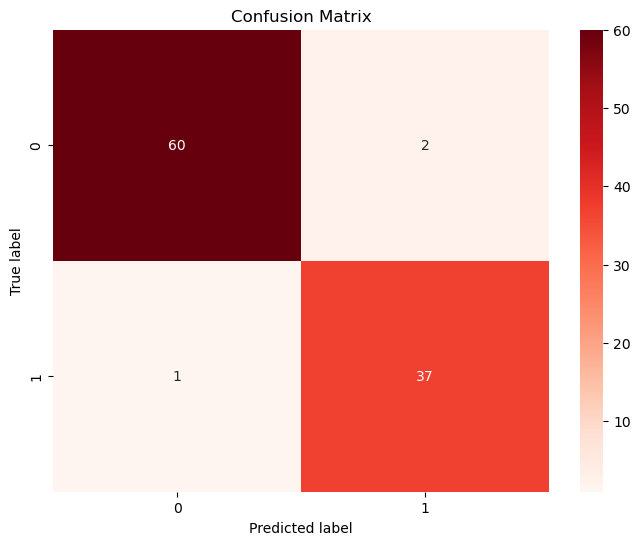

In [236]:
#plt.imshow(conf,origin=1)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf, annot=True, cmap="Reds", fmt="d", ax=ax)

# Set the labels
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix")
plt.savefig("confusion.jpg")

In [237]:
acc = accuracy_score(Y_test, Y_pred)
acc*100

97.0

In [238]:
acc1 = accuracy_score(Y_test, Y2_pred)
acc1*100

61.0